In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv("../lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#renaming the columns
cols = [customer_df.columns[i].lower().replace(' ','_') for i in range (len(customer_df.columns))]
customer_df.columns = cols

In [4]:
#changing effective_to_date column to datetime
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [5]:
customer_df.drop('customer', axis=1, inplace=True) #dropping the customer(customer_id) column

In [6]:
numerical_df = customer_df.select_dtypes("number")
categorical_df = customer_df.select_dtypes("object")

In [7]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


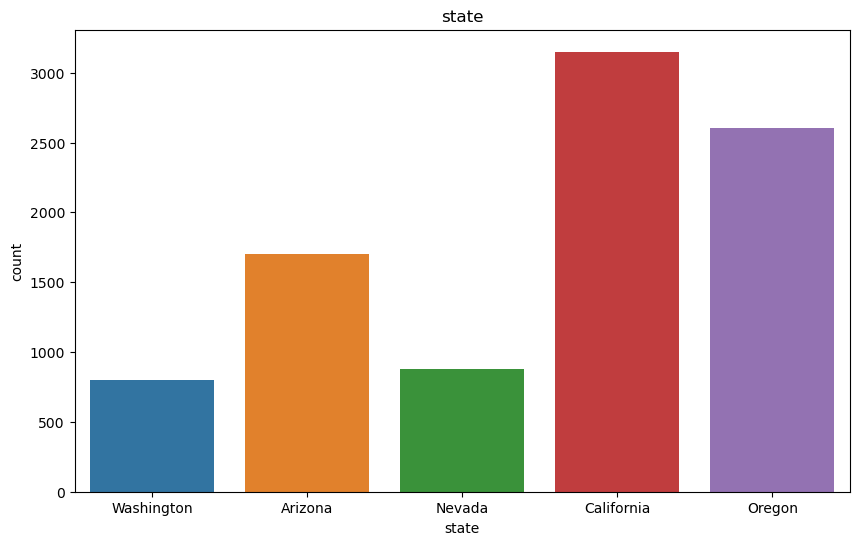

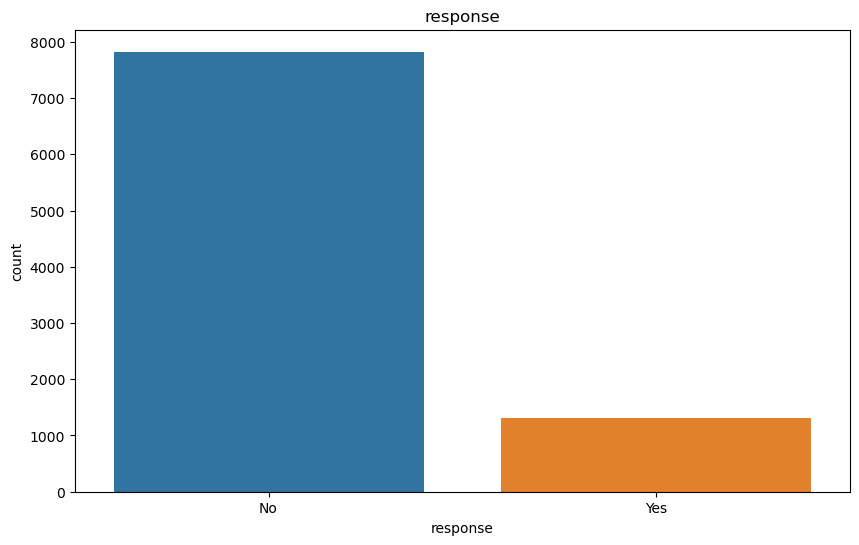

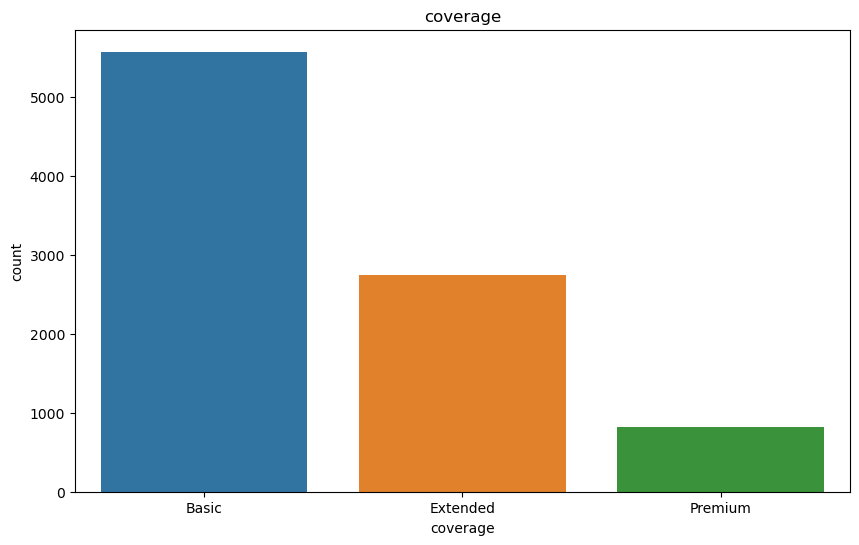

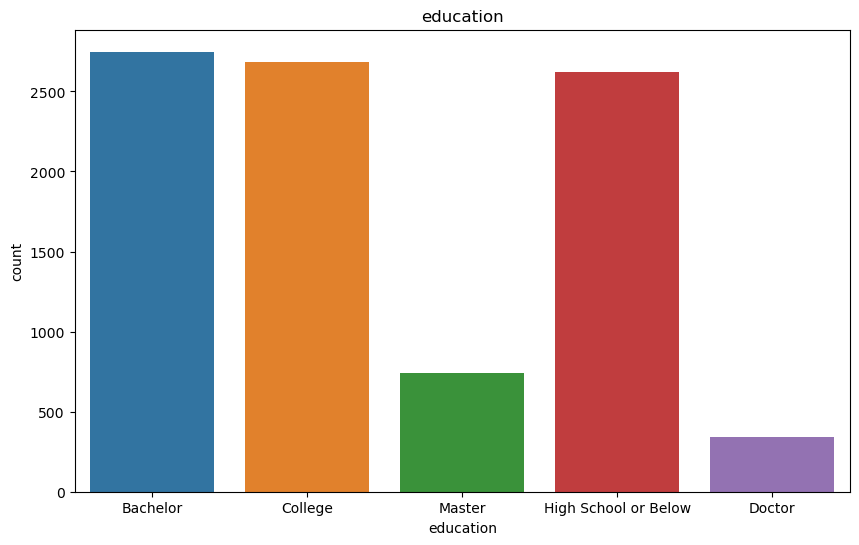

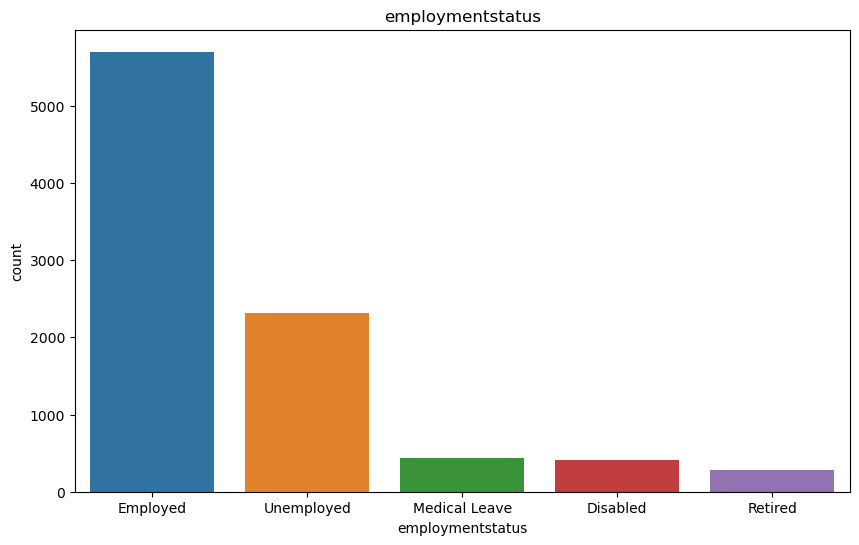

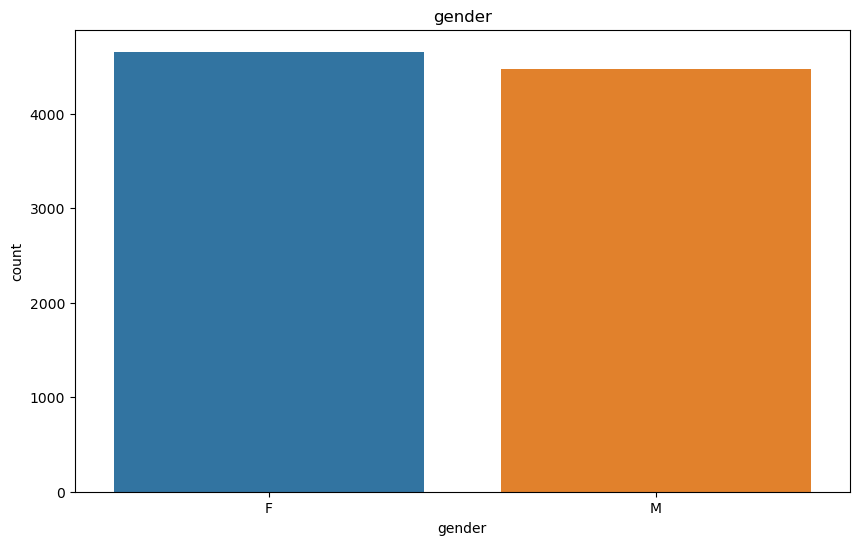

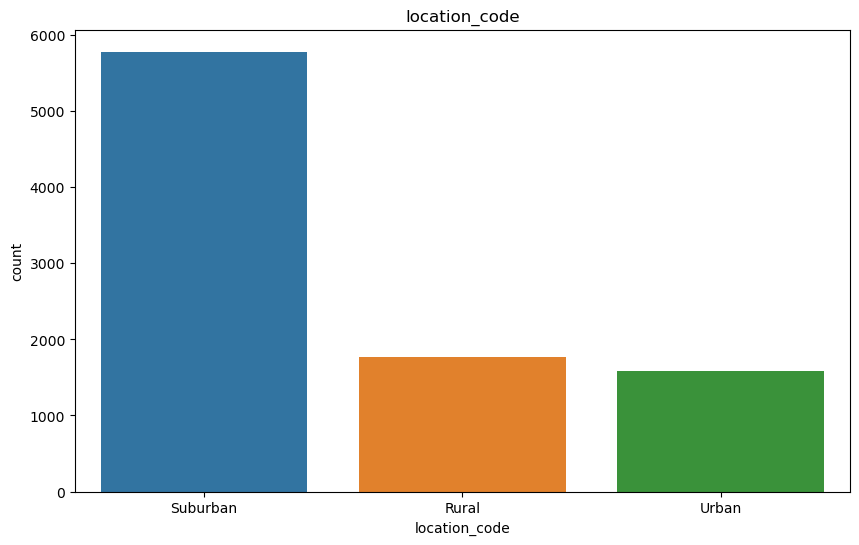

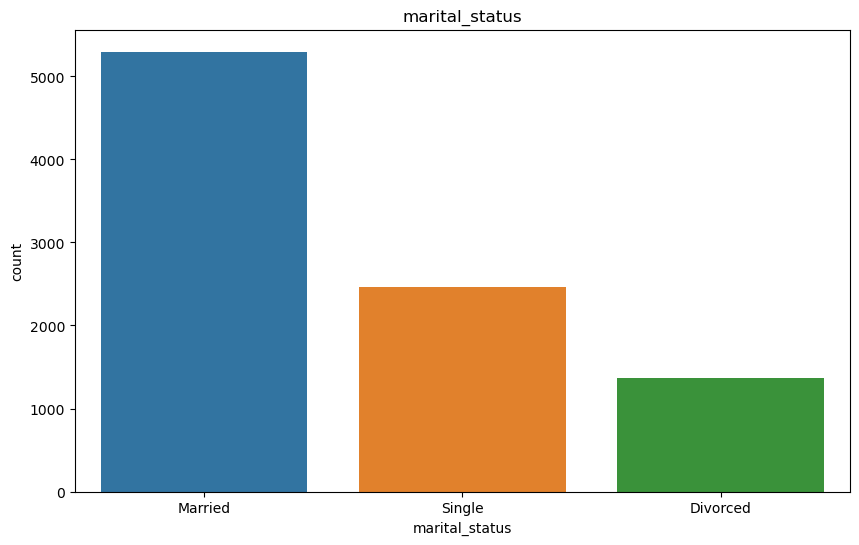

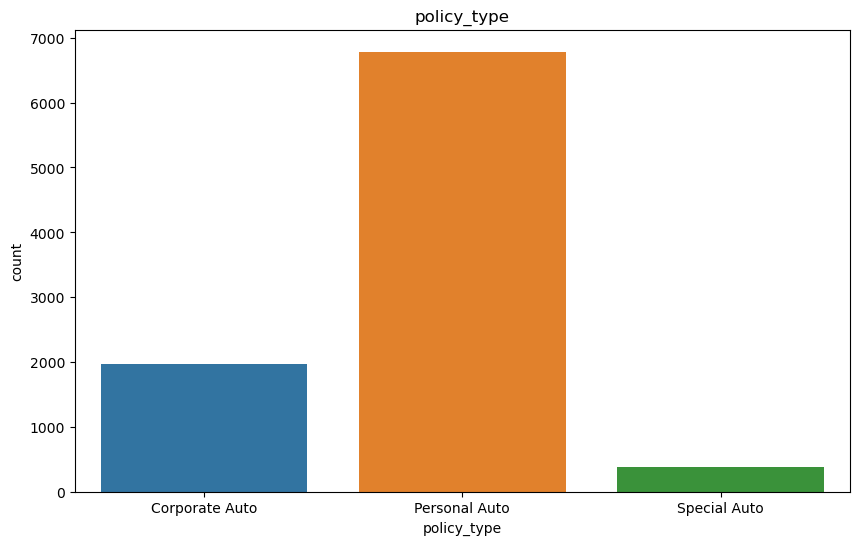

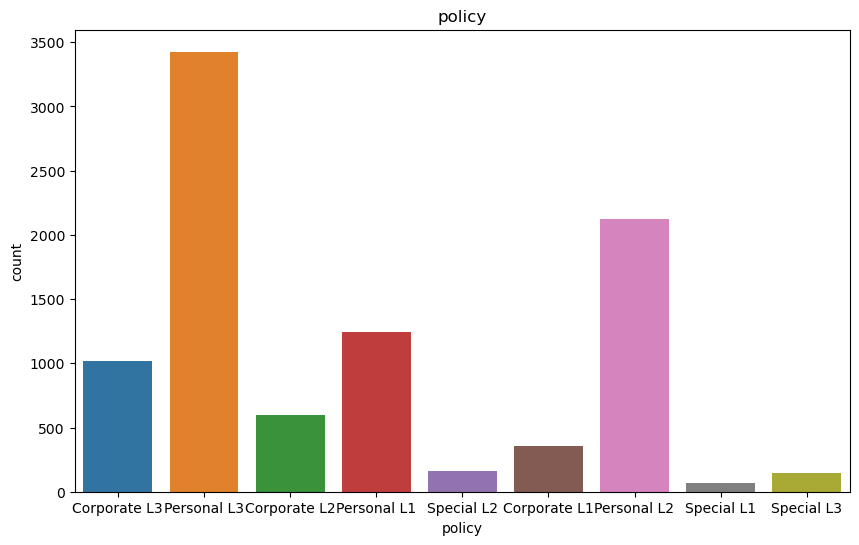

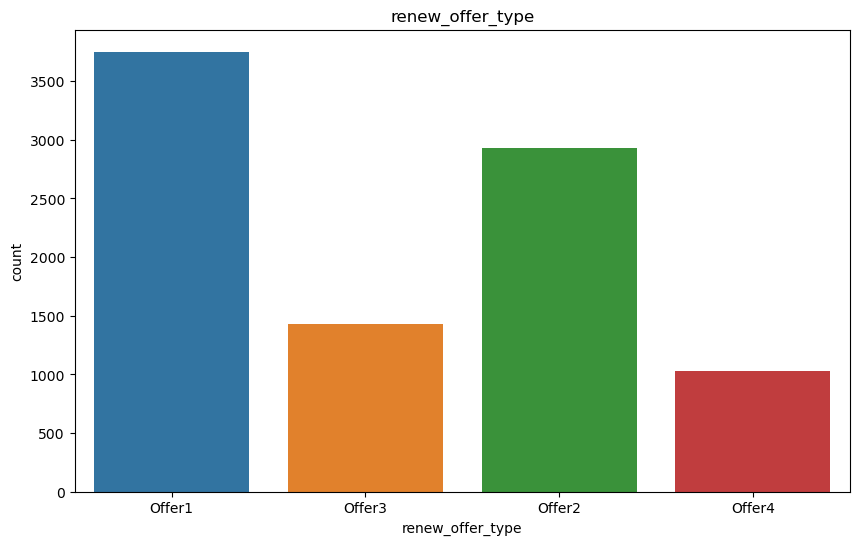

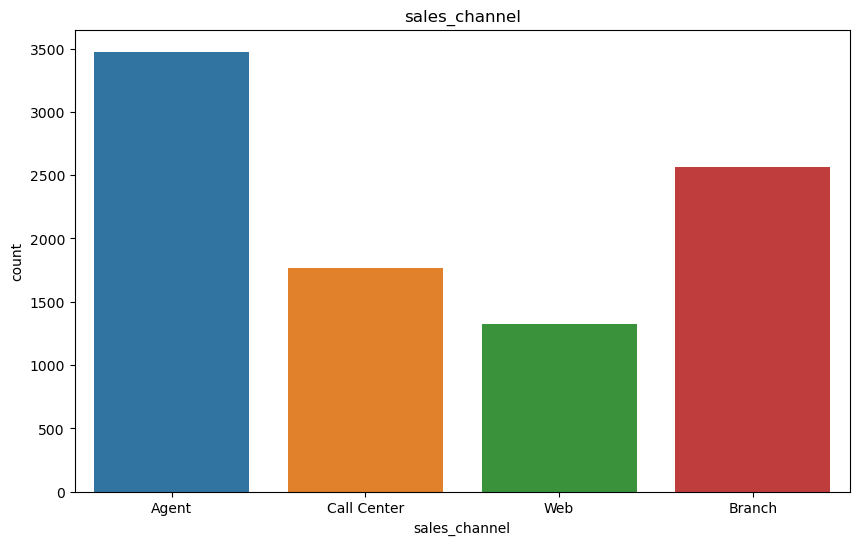

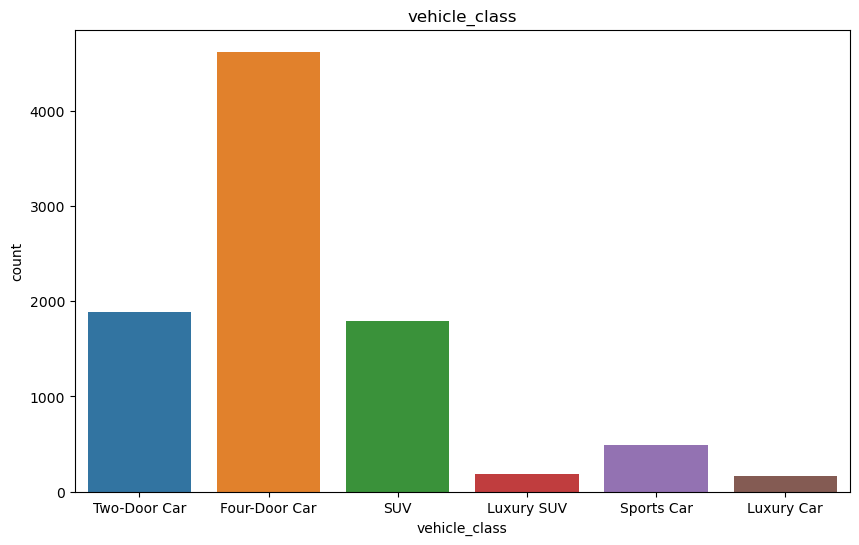

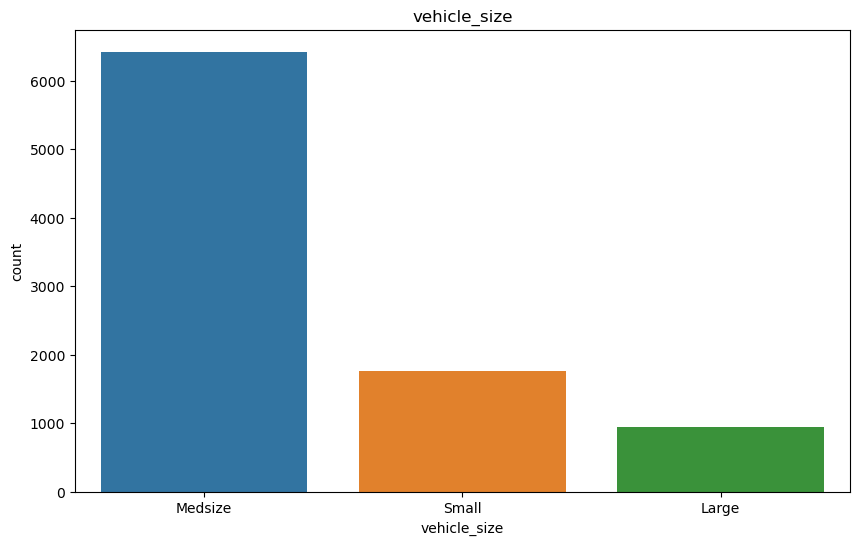

In [8]:
#we can use countplot to see how the data is distributed between different values for each feature 
for col in categorical_df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=categorical_df, x=col)
    plt.title(col)
    plt.show()

In [9]:
# checking value counts for categorical columns: 
for col in categorical_df:
    print(categorical_df[col].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Cor

In [10]:
customer_df1 = customer_df.copy() #first saving the copy

In [11]:
customer_df1.drop('policy_type', axis=1, inplace=True) #dropping the policy_type column

In [12]:
customer_df1.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
customer_df2 = customer_df1.copy()

In [14]:
#The column effective_to_date is a datetime series. From it, we can extract day, month and year and create columns for that:
#customer_df2['day'] = customer_df1['effective_to_date'].dt.strftime('%d')
#customer_df2['month'] = customer_df1['effective_to_date'].dt.strftime('%m')
#customer_df2['year'] = customer_df1['effective_to_date'].dt.strftime('%Y')
#customer_df2

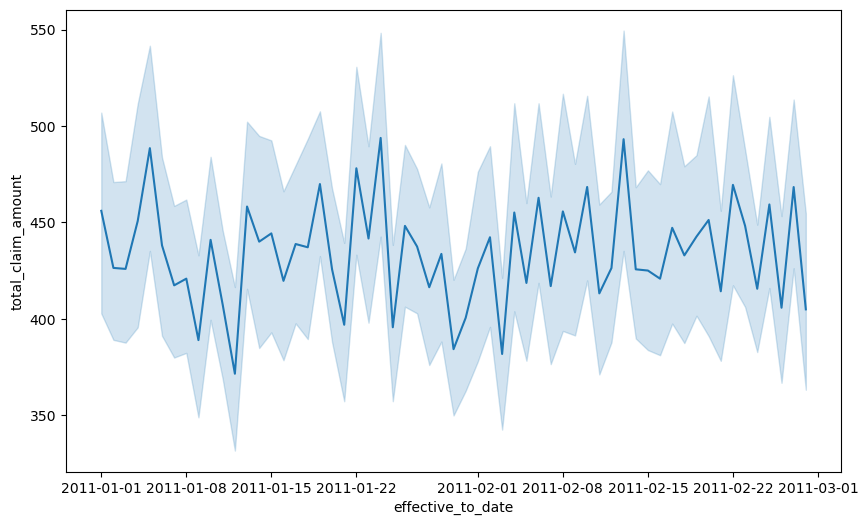

In [15]:
#having entire dataset included in the plot we include repeated values for each date and plot shows us the mean and 95% confidence interval:
plt.figure(figsize=(10,6))
sns.lineplot(data=customer_df2, x='effective_to_date', y='total_claim_amount')
plt.show()

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [16]:
customer_df2.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [17]:
#looping through numerical columns to check the outliers range for each of them:
for col in numerical_df.columns:
    IQR = abs(np.quantile(numerical_df[col], .25) - np.quantile(numerical_df[col], .75)) * 1.5
    lower_boundary = np.quantile(numerical_df[col], .25) - IQR
    upper_boundary = np.quantile(numerical_df[col], .75) + IQR
    print (col, lower_boundary, upper_boundary)

customer_lifetime_value -3457.6210762500014 16414.039911750002
income -93480.0 155800.0
monthly_premium_auto 6.5 170.5
months_since_last_claim -19.5 48.5
months_since_policy_inception -46.5 141.5
number_of_open_complaints 0.0 0.0
number_of_policies -3.5 8.5
total_claim_amount -140.62664687499995 960.3997301249999


In [18]:
def remove_outliers(df):
    df_no_outliers = pd.DataFrame()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            IQR = abs(np.quantile(df[col], .25) - np.quantile(df[col], .75)) * 1.5
            lower_boundary = np.quantile(df[col], .25) - IQR
            upper_boundary = np.quantile(df[col], .75) + IQR
            filtered_col = df[(df[col] >= lower_boundary) & (df[col] <= upper_boundary)][col]
            df_no_outliers[col] = filtered_col
        else:
            df_no_outliers[col] = df[col]
    return df_no_outliers

In [19]:
customer_df2_filtered = remove_outliers(customer_df2)
customer_df2_filtered

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69.0,32,5,0.0,1.0,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94.0,13,42,0.0,8.0,Personal L3,Offer3,Agent,NaN,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108.0,18,38,0.0,2.0,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106.0,18,65,0.0,7.0,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73.0,12,44,0.0,1.0,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,NaN,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73.0,18,89,0.0,2.0,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79.0,14,28,0.0,1.0,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85.0,9,37,NaN,2.0,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96.0,34,3,0.0,3.0,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [20]:
customer_df2_filtered.isna().sum() #removing outliers created NaNs

state                               0
customer_lifetime_value           817
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto              430
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        1882
number_of_policies                416
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                453
vehicle_class                       0
vehicle_size                        0
dtype: int64

In [21]:
#Filling in the NaNs with the median:
customer_df2_filtered["customer_lifetime_value"] = customer_df2_filtered["customer_lifetime_value"].fillna(customer_df2_filtered["customer_lifetime_value"].median())
customer_df2_filtered["monthly_premium_auto"] = customer_df2_filtered["monthly_premium_auto"].fillna(customer_df2_filtered["monthly_premium_auto"].median())
customer_df2_filtered["number_of_open_complaints"] = customer_df2_filtered["number_of_open_complaints"].fillna(customer_df2_filtered["number_of_open_complaints"].median())
customer_df2_filtered["number_of_policies"] = customer_df2_filtered["number_of_policies"].fillna(customer_df2_filtered["number_of_policies"].median())
customer_df2_filtered["total_claim_amount"] = customer_df2_filtered["total_claim_amount"].fillna(customer_df2_filtered["total_claim_amount"].median())
customer_df2_filtered.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [22]:
customer_df3 =  customer_df2_filtered.copy()

In [23]:
categorical_df1 = customer_df3.select_dtypes("object")
categorical_df1.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
# Ordinal ones:
customer_df3["coverage"] = customer_df3["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}) # Ordinal to coverage
customer_df3["education"] = customer_df3["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" :3, "Doctor" :4})# Ordinal to education
customer_df3["employmentstatus"] = customer_df3["employmentstatus"].map({"Unemployed" : 0, "Disabled" : 1, "Retired" : 2, "Medical Leave" :3, "Employed" :4}) # Ordinal to employmentstatus
customer_df3["location_code"] = customer_df3["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2}) # Ordinal to location code

In [25]:
# For the rest I will use .get_dummies
customer_df3 = pd.get_dummies(customer_df3, drop_first=True)
customer_df3

,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,0,2,2011-02-24,4,56274,0,69.0,32,5,0.0,1.0,384.811147,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,1,2,2011-01-31,0,0,0,94.0,13,42,0.0,8.0,364.800000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,2,2,2011-02-19,4,48767,0,108.0,18,38,0.0,2.0,566.472247,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,2,2011-01-20,0,0,0,106.0,18,65,0.0,7.0,529.881344,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,0,2,2011-02-03,4,43836,1,73.0,12,44,0.0,1.0,138.130879,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,5470.060561,0,2,2011-02-10,4,71941,2,73.0,18,89,0.0,2.0,198.234764,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,1,1,2011-02-12,4,21604,0,79.0,14,28,0.0,1.0,379.200000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,1,2,2011-02-06,0,0,0,85.0,9,37,0.0,2.0,790.784983,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,1,1,2011-02-03,4,21941,0,96.0,34,3,0.0,3.0,691.200000,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [26]:
customer_df3['weekday'] = customer_df3['effective_to_date'].dt.strftime('%w')
customer_df3['month'] = customer_df3['effective_to_date'].dt.strftime('%m')
customer_df3['weekday'] = customer_df3['weekday'].astype(int)
customer_df3['month'] = customer_df3['month'].astype(int)
customer_df3.drop('effective_to_date', axis=1, inplace=True) #after extracting the weekday and month, I'm dropping this column

In [27]:
customer_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   coverage                       9134 non-null   int64  
 2   education                      9134 non-null   int64  
 3   employmentstatus               9134 non-null   int64  
 4   income                         9134 non-null   int64  
 5   location_code                  9134 non-null   int64  
 6   monthly_premium_auto           9134 non-null   float64
 7   months_since_last_claim        9134 non-null   int64  
 8   months_since_policy_inception  9134 non-null   int64  
 9   number_of_open_complaints      9134 non-null   float64
 10  number_of_policies             9134 non-null   float64
 11  total_claim_amount             9134 non-null   float64
 12  state_California               9134 non-null   u

In [28]:
#for the model we need integers so I need to convert floats to int: 
float_col = customer_df3.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    customer_df3[col] = customer_df3[col].astype('int64')

In [29]:
customer_df_final = customer_df3.copy() #creating final copy 

## 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
#first I'll split the features from the target (total_claim_amount)
X = customer_df_final.drop(["total_claim_amount"], axis=1)
y = customer_df_final["total_claim_amount"]

In [32]:
#train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,customer_lifetime_value,coverage,education,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,weekday,month
434,5015,1,2,4,48567,0,130,12,15,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,2
4641,5149,1,2,4,26877,0,131,5,2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,6,1
4952,4904,1,1,2,12902,0,139,3,51,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2
1489,8510,1,1,0,0,0,121,5,94,0,8,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,6,1
812,3278,1,4,4,70247,1,83,13,19,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334,0,1,4,87957,0,61,31,63,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6,1
5191,5498,0,1,3,22520,0,73,17,64,0,3,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6,2
5390,8992,1,0,0,0,0,129,13,4,0,7,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,4,1
860,14635,1,2,0,0,0,139,5,56,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2


In [33]:
#normalizing variables using standard scaler:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [34]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
predictions = lm.predict(X_test_scaled)

rmse = mean_squared_error(y_test, predictions, squared=False) 
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.41
RMSE: 157.92502451870203
MAE: 120.54802234348308


The model is not great with low R2 score (model doesn't generalize well) and from RMSE we can see that we get high errors (predictions far from the actual values). 

## 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [35]:
def model_train_test (models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = [] #creating the list which will include all the models' results
    for model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        r2 = round(r2_score(y_test, pred), 2)
        rmse = mean_squared_error(y_test, pred)
        result = {
            'model': model, 
            'R2_score': r2,
            'RMSE_score': rmse
        }
        results.append(result)
    return results

## 4. Use the function to check LinearRegressor and KNeighborsRegressor.

## 5. You can check also the MLPRegressor for this task!

In [36]:
lm = LinearRegression()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=500)

models = [lm, knn, mlp] #list of models to test

X = customer_df_final.drop(["total_claim_amount"], axis=1) 
y = customer_df_final["total_claim_amount"] 

model_train_test(models, X, y) #applying the function to train and test the models

[{'model': LinearRegression(),
  'R2_score': 0.41,
  'RMSE_score': 24940.39011239613},
 {'model': KNeighborsRegressor(),
  'R2_score': 0.11,
  'RMSE_score': 37611.44859540314},
 {'model': MLPRegressor(max_iter=500),
  'R2_score': 0.24,
  'RMSE_score': 32087.375918884372}]

## 6. Check and discuss the results.

Linear Regression model got the best R2 result of 0.41. Even though the highest amongst those three models, it's still not the best result and further work (data engineering or through adding new features to improve the precision of models).  would be needed in order to improve the model. 
We can see that the KNeighbotsRegressor got highest errors, while Linear Regression model achieved lower error variance. 
Overall, the most promising results were given by Linear Regression model with the highest R2 and lowest RMSE. 